# Regularization and Hyperparameters tuning

In [ ]:
# the objective is to determine the best parameters to improve our model
# which consists of making a prediction on daibete

## Import libraries

*   [Pandas](https://pandas.pydata.org/docs/getting_started/index.html#intro-to-pandas) provides data structures to work with relational (tabular) data.
*   [NumPy](https://numpy.org/) provides numerical computing tools (mathematical functions, linear algebra routines, etc.)
*   [Matplotlib](https://matplotlib.org/) allows to create visualizations.
*   [Seaborn](https://seaborn.pydata.org/) is based on Matplotlib. It provides a high-level interface for drawing graphics.
*   [scikit-learn](https://scikit-learn.org/) is a Python package for Machine Learning. It contains a lot of modules. Only those that are needed will be imported later in the code.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# some settings for displaying data and for graphics
pd.set_option('display.max_columns', None)
sns.set_style("dark")
sns.set(rc={'figure.figsize':(12,4)})

## 1. Regression

### Import data

Data for regression: [Diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).

Ten baseline variables were obtained for each of `442` diabetes patients, as well as the response of interest, a **quantitative measure of disease progression** one year after baseline.

**Features**:

*   `age` age in years
*   `sex`
*   `bmi` body mass index
*   `bp` average blood pressure
*   `s1` tc, total serum cholesterol
*   `s2` ldl, low-density lipoproteins
*   `s3` hdl, high-density lipoproteins
*   `s4` tch, total cholesterol / HDL
*   `s5` ltg, possibly log of serum triglycerides level
*   `s6` glu, blood sugar level

In [ ]:
from sklearn.datasets import load_diabetes

# Load data: feature variables (X) and target variable (y)
# scaled=True: to load scaled data
X, y = load_diabetes(return_X_y=True, as_frame=True, scaled=True)

# Rename columns to add semantics
X.columns = ['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']

# Display features along with the target
pd.concat([X,y], axis=1)

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


### Splitting data

Split data on train and test subsets. It is done in a random way. If you want to be able to reproduce the results of your code, you need to fix the value of the `random_state` argument.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# define an empty dictionary to save performance for different linear regression models
reg_results = {}

### Linear regression

#### Baseline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import Bunch

MODELNAME = 'baseline'
reg_results[MODELNAME] = Bunch()

# Create a class instance
lr = LinearRegression()

# Train the model using train data
lr.fit(X_train, y_train)

# save model and model parameters
reg_results[MODELNAME].model = lr
reg_results[MODELNAME].coef_ = pd.DataFrame({'modelname': MODELNAME, 'feature': lr.feature_names_in_, 'coef': lr.coef_})

# Make predictions for train and test data
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# save model performance
reg_results[MODELNAME].mse_train = mean_squared_error(y_train, y_pred_train)
reg_results[MODELNAME].mse_test = mean_squared_error(y_test, y_pred_test)
reg_results[MODELNAME].r2_test = r2_score(y_test, y_pred_test)

print(f'MSE on train data: {reg_results[MODELNAME].mse_train:.2f}')
print(f'MSE on test data: {reg_results[MODELNAME].mse_test:.2f}')
print(f"R^2 on test data: {reg_results[MODELNAME].r2_test:.2f}")

MSE on train data: 2868.55
MSE on test data: 2900.19
R^2 on test data: 0.45


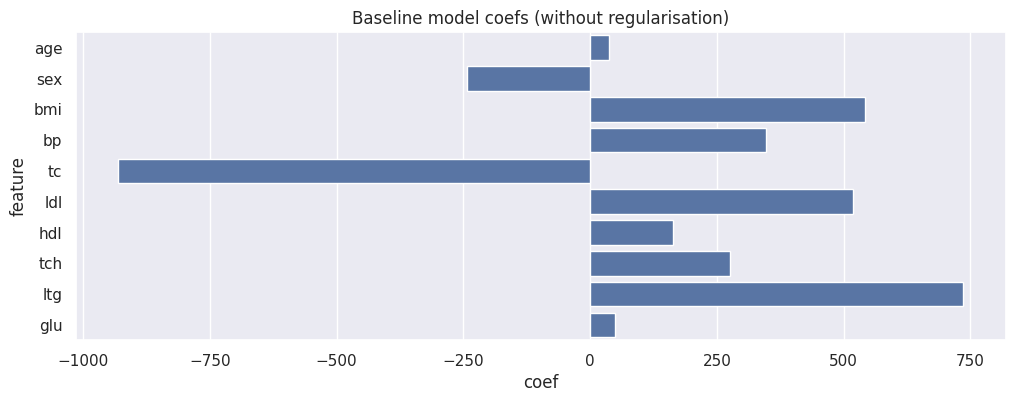

In [ ]:
sns.barplot(data=reg_results[MODELNAME].coef_, y='feature', x='coef', color='b')
plt.title('Baseline model coefs (without regularisation)');

#### Regularization

##### L1: Lasso

In [ ]:
from sklearn.linear_model import Lasso

best_score = 10000

# alpha is a hyperparameter for Lasso Linear Regression
# Test different values of alpha and choose the model with the best score
for alpha in np.arange(1e-5, 2.1, 0.25):

    lr_lasso = Lasso(alpha=alpha)
    lr_lasso.fit(X_train, y_train)

    y_pred_train = lr_lasso.predict(X_train)
    y_pred_test = lr_lasso.predict(X_test)

    score_train = mean_squared_error(y_train, y_pred_train)
    score_test = mean_squared_error(y_test, y_pred_test)

    print(f'alpha={alpha}')
    print(f'MSE on train data: {score_train:.2f}')
    print(f'MSE on test data: {score_test:.2f}')
    print(lr_lasso.coef_,'\n')

    if score_test < best_score:
      best_score = score_test
      best_lr_lasso = lr_lasso

alpha=1e-05
MSE on train data: 2868.55
MSE on test data: 2900.15
[  37.90278614 -241.95575036  542.43833784  347.69594847 -930.82311722
  517.5593385   163.10038399  275.18974321  735.95521653   48.67259322] 

alpha=0.25001
MSE on train data: 3070.50
MSE on test data: 2842.20
[   0.          -43.54453889  545.6489169   243.34857104   -0.
   -0.         -167.07075906    0.          390.12220203    0.        ] 

alpha=0.50001
MSE on train data: 3271.24
MSE on test data: 2945.15
[  0.          -0.         513.58587212 165.49481459  -0.
  -0.         -72.68033067   0.         354.64862259   0.        ] 

alpha=0.75001
MSE on train data: 3545.71
MSE on test data: 3146.40
[  0.          -0.         472.73692128  97.09643998   0.
   0.          -0.           0.         316.60400672   0.        ] 

alpha=1.00001
MSE on train data: 3860.77
MSE on test data: 3403.59
[  0.          -0.         413.42947598  34.8280247    0.
   0.          -0.           0.         258.15055523   0.        ] 

alph

In [ ]:
MODELNAME = 'lasso'
reg_results[MODELNAME] = Bunch()

# save model and model parameters
reg_results[MODELNAME].model = best_lr_lasso
reg_results[MODELNAME].coef_ = pd.DataFrame({'modelname': MODELNAME, 'feature': best_lr_lasso.feature_names_in_, 'coef': best_lr_lasso.coef_})

# save model performance
y_pred_test = best_lr_lasso.predict(X_test)
reg_results[MODELNAME].mse_test = mean_squared_error(y_test, y_pred_test)
reg_results[MODELNAME].r2_test = r2_score(y_test, y_pred_test)

print(f'MSE on test data: {reg_results[MODELNAME].mse_test:.2f}')
print(f"R^2 on test data: {reg_results[MODELNAME].r2_test:.2f}")

MSE on test data: 2842.20
R^2 on test data: 0.46


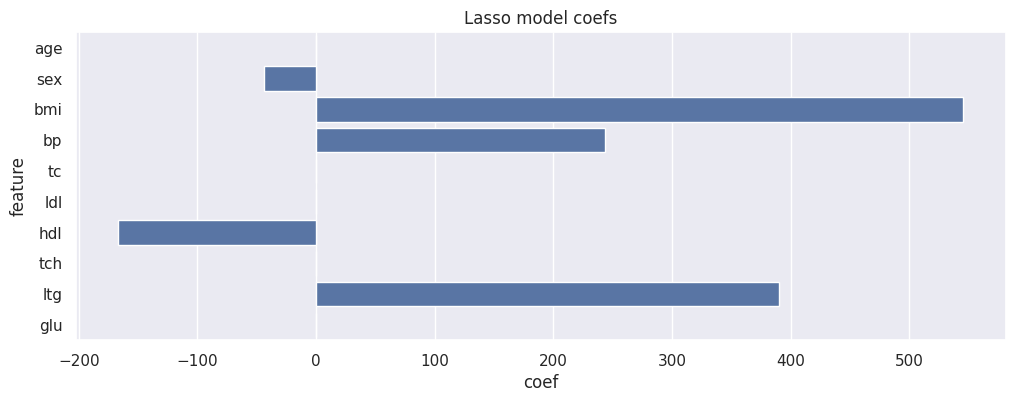

In [ ]:
sns.barplot(data=reg_results[MODELNAME].coef_, y='feature', x='coef', color='b')
plt.title('Lasso model coefs');

`age`, `tc`, `ldl`, `tch` and `glu` are eliminated in this case.

##### L2: Ridge

In [ ]:
from sklearn.linear_model import Ridge

best_score = 10000

# alpha is a hyperparameter for Ridge Linear Regression
for alpha in np.arange(1e-5, 2.1, 0.25):

    lr_ridge = Ridge(alpha=alpha)
    lr_ridge.fit(X_train, y_train)

    y_pred_train = lr_ridge.predict(X_train)
    y_pred_test = lr_ridge.predict(X_test)

    score_train = mean_squared_error(y_train, y_pred_train)
    score_test = mean_squared_error(y_test, y_pred_test)

    print(f'alpha={alpha}')
    print(f'MSE on train data: {score_train:.2f}')
    print(f'MSE on test data: {score_test:.2f}')
    print(lr_ridge.coef_,'\n')

    if score_test < best_score:
      best_score = score_test
      best_lr_ridge = lr_ridge

alpha=1e-05
MSE on train data: 2868.55
MSE on test data: 2900.14
[  37.91059524 -241.95794215  542.44550643  347.69378161 -930.31222272
  517.14455713  162.89302199  275.15315209  735.7449881    48.68238539] 

alpha=0.25001
MSE on train data: 2978.28
MSE on test data: 2860.27
[  44.27248045 -166.63067342  445.80002385  286.32733269  -57.65019668
  -83.23027884 -189.39475558  140.60445204  339.6200424    99.99653598] 

alpha=0.50001
MSE on train data: 3115.60
MSE on test data: 2917.18
[  45.64293899 -123.52176518  376.14919077  248.40943788  -26.89827615
  -59.71603919 -172.54855225  131.89558683  289.15855444  112.14643076] 

alpha=0.75001
MSE on train data: 3255.97
MSE on test data: 2995.05
[  45.87053841  -95.75789331  327.57226938  220.56428484  -10.71185862
  -41.60045735 -157.26269608  125.22268967  255.39937288  114.05080108] 

alpha=1.00001
MSE on train data: 3388.19
MSE on test data: 3077.42
[  45.36734716  -76.66544428  291.33756231  198.99504959   -0.52998056
  -28.57660859 -

In [ ]:
MODELNAME = 'ridge'
reg_results[MODELNAME] = Bunch()

# save model and model parameters
reg_results[MODELNAME].model = best_lr_ridge
reg_results[MODELNAME].coef_ = pd.DataFrame({'modelname': MODELNAME, 'feature': best_lr_ridge.feature_names_in_, 'coef': best_lr_ridge.coef_})

# save model performance
y_pred_test = best_lr_ridge.predict(X_test)
reg_results[MODELNAME].mse_test = mean_squared_error(y_test, y_pred_test)
reg_results[MODELNAME].r2_test = r2_score(y_test, y_pred_test)

print(f'MSE on test data: {reg_results[MODELNAME].mse_test:.2f}')
print(f"R^2 on test data: {reg_results[MODELNAME].r2_test:.2f}")

MSE on test data: 2860.27
R^2 on test data: 0.46


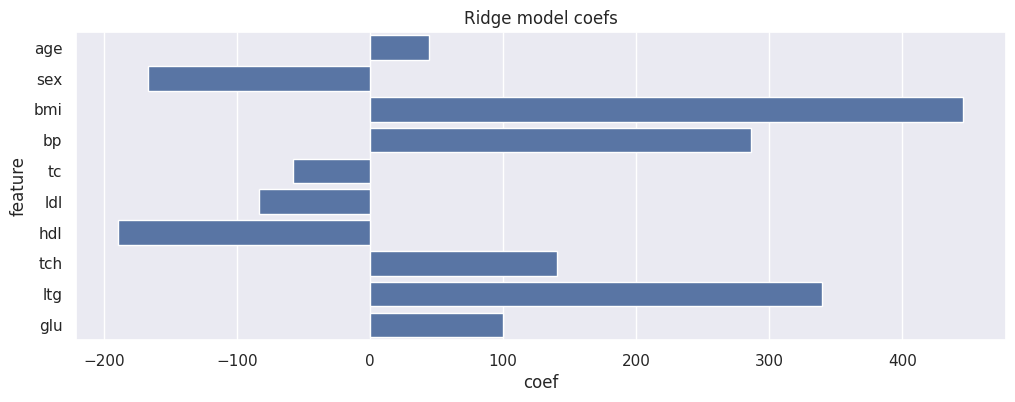

In [ ]:
sns.barplot(data=reg_results[MODELNAME].coef_, y='feature', x='coef', color='b')
plt.title('Ridge model coefs');

##### Summary

Coef values are lower in comparison with baseline.

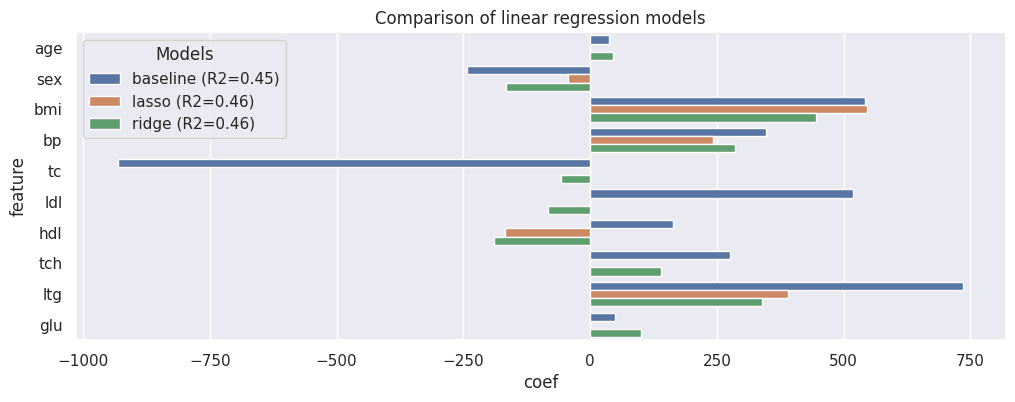

In [ ]:
modelnames = ['baseline', 'lasso', 'ridge']
labels = [f'{x} (R2={reg_results[x].r2_test:.2f})' for x in modelnames]

coef_ = pd.concat([
    reg_results[modelnames[0]].coef_,
    reg_results[modelnames[1]].coef_,
    reg_results[modelnames[2]].coef_])

g = sns.barplot(data=coef_, y='feature', x='coef', hue='modelname')

# replace legend labels
for i, t in enumerate(g.legend().texts):
    t.set_text(labels[i])
# add legend title and change location
sns.move_legend(g, "upper left", title='Models')

plt.title('Comparison of linear regression models');

#### Hyperparameters tuning with Grid Search

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV

[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) aims to maximize the scoring. As MSE should be minimized for linear regression, the valid scoring value is `neg_mean_squared_error`.

GridSearchCV uses cross validation with `cv=5` folds. `mean_test_score` is the mean scoring for the validation set after `cv=5` iterations.


##### L1: Lasso

In [ ]:
lr_lasso = Lasso(max_iter=10000)
params = {"alpha": np.arange(1e-5, 2., 0.1)}

# GridSearchCV aims to maximize score. As MSE should be minimized,
# the valid scoring value is neg_mean_squared_error
gs_lasso = GridSearchCV(lr_lasso, params, cv=5, scoring='neg_mean_squared_error')
gs_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid=[{'alpha': array([1.00000e-05, 1.00010e-01, 2.00010e-01, 3.00010e-01, 4.00010e-01,
       5.00010e-01, 6.00010e-01, 7.00010e-01, 8.00010e-01, 9.00010e-01,
       1.00001e+00, 1.10001e+00, 1.20001e+00, 1.30001e+00, 1.40001e+00,
       1.50001e+00, 1.60001e+00, 1.70001e+00, 1.80001e+00, 1.90001e+00])}],
             scoring='neg_mean_squared_error')

In [ ]:
# scores for each iteration
-gs_lasso.cv_results_["mean_test_score"]

array([3142.9978265 , 3128.89112588, 3184.80679203, 3273.10818619,
       3338.75408734, 3419.95875205, 3506.66291734, 3605.40436793,
       3724.30755417, 3854.73086026, 3997.79805894, 4148.12051122,
       4304.57740072, 4466.07120466, 4638.25152198, 4822.89986216,
       5020.0127743 , 5229.59214213, 5433.08470754, 5624.97854851])

In [ ]:
# params corresponding to the best score
gs_lasso.best_params_

{'alpha': 0.10001}

In [ ]:
# Evaluate the performance of the model with the best score

y_pred_train = gs_lasso.best_estimator_.predict(X_train)
y_pred_test = gs_lasso.best_estimator_.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'MSE on train data: {mse_train:.2f}')
print(f'MSE on test data: {mse_test:.2f}')
print(f"R^2 on test data: {r2_test:.2f}")

MSE on test data: 2798.19
R^2 on test data: 0.47


##### L2: Ridge

In [ ]:
lr_ridge = Ridge(max_iter=10000)
params = [{"alpha": np.arange(1e-5, 2., 0.1)}]

gs_ridge = GridSearchCV(lr_ridge, params, cv=5, scoring='neg_mean_squared_error')
gs_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(max_iter=10000),
             param_grid=[{'alpha': array([1.00000e-05, 1.00010e-01, 2.00010e-01, 3.00010e-01, 4.00010e-01,
       5.00010e-01, 6.00010e-01, 7.00010e-01, 8.00010e-01, 9.00010e-01,
       1.00001e+00, 1.10001e+00, 1.20001e+00, 1.30001e+00, 1.40001e+00,
       1.50001e+00, 1.60001e+00, 1.70001e+00, 1.80001e+00, 1.90001e+00])}],
             scoring='neg_mean_squared_error')

In [ ]:
# scores for each iteration
-gs_ridge.cv_results_["mean_test_score"]

array([3142.95166015, 3125.19260292, 3160.07279844, 3213.77141679,
       3274.93953267, 3338.5239096 , 3402.08222809, 3464.39889258,
       3524.87669293, 3583.24414028, 3639.40583769, 3693.36254855,
       3745.16709887, 3794.89948303, 3842.65260338, 3888.52405369,
       3932.61140782, 3975.00957266, 4015.80936866, 4055.09684356])

In [ ]:
# params corresponding to the best score
gs_ridge.best_params_

{'alpha': 0.10001}

In [ ]:
# Evaluate the performance of the model with the best score

y_pred_train = gs_ridge.best_estimator_.predict(X_train)
y_pred_test = gs_ridge.best_estimator_.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'MSE on train data: {mse_train:.2f}')
print(f'MSE on test data: {mse_test:.2f}')
print(f"R^2 on test data: {r2_test:.2f}")

MSE on test data: 2856.49
R^2 on test data: 0.46


### Decision Tree regression

Decision trees can be applied not only to classification problems, but also to regression problems, using the [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) class.

#### Baseline

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a class instance
dtr = DecisionTreeRegressor()

# Train the model using train data
dtr.fit(X_train, y_train)

# Make predictions
y_pred_train = dtr.predict(X_train)
y_pred_test = dtr.predict(X_test)

# Evaluate model performance
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'MSE on train data: {mse_train:.2f}')
print(f'MSE on test data: {mse_test:.2f}')
print(f"R^2 on test data: {r2_test:.2f}")

MSE on train data: 0.00
MSE on test data: 4470.25
R^2 on test data: 0.16


The model is highly **overfitted**: error on train data is very low (0 in this case), error on test data is very high.

#### Regularization

In [ ]:
params = {'max_depth': np.arange(2, 10, 1)}

gs_dtr = GridSearchCV(DecisionTreeRegressor(), params, cv=5, scoring='neg_mean_squared_error', verbose=2)
gs_dtr.fit(X_train, y_train);

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................

In [ ]:
# scores for each iteration
-gs_dtr.cv_results_["mean_test_score"]

array([3774.44789683, 4198.59377753, 4240.41387369, 4495.67060983,
       5199.97555929, 5884.14240575, 5915.48739254, 5845.44679269])

In [ ]:
# params corresponding to the best score
gs_dtr.best_params_

{'max_depth': 2}

In [ ]:
# Evaluate the performance of the model with the best score

y_pred_train = gs_dtr.best_estimator_.predict(X_train)
y_pred_test = gs_dtr.best_estimator_.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'MSE on train data: {mse_train:.2f}')
print(f'MSE on test data: {mse_test:.2f}')
print(f"R^2 on test data: {r2_test:.2f}")

MSE on train data: 3358.63
MSE on test data: 3735.50
R^2 on test data: 0.29


There is **no overfitting** after regularization.

## 2. Classification

### Import data

scikit-learn comes with a few small standard datasets that do not require to download any file from some external website. In this lab the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset) will be used. It is loaded using [load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) function.

The dataset contains 30 numeric, predictive attributes and the class for `569` patients.

**Features**:

*   `radius` (mean of distances from center to points on the perimeter)
*   `texture` (standard deviation of gray-scale values)
*   `perimeter`
*   `area`
*   `smoothness` (local variation in radius lengths)
*   `compactness` (perimeter^2 / area - 1.0)
*   `concavity` (severity of concave portions of the contour)
*   `concave points` (number of concave portions of the contour)
*   `symmetry`
*   `fractal dimension` ("coastline approximation" - 1)

The `mean`, `standard error`, and `worst` or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features. For instance, field 0 is Mean Radius, field 10 is Radius SE, field 20 is Worst Radius.

**Class**:

*   `WDBC-Malignant`
*   `WDBC-Benign`

In [ ]:
from sklearn.datasets import load_breast_cancer

# Load data: feature variables (X) and target variable (y)
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

# Display features along with the target
pd.concat([X,y], axis=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Splitting data

Split data on train and test subsets. It is done in a random way. If you want to be able to reproduce the results of your code, you need to fix the value of the `random_state` argument.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


### Baseline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score

# Create a class instance
clf_lr = LogisticRegression()

# Train the model using train data
clf_lr.fit(X_train, y_train);

# Make predictions
y_pred = clf_lr.predict(X_test)
y_pred_probas = clf_lr.predict_proba(X_test)[:,1]

# Calculate the scores
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1:.2f}")

roc_auc = roc_auc_score(y_test, y_pred_probas)
print(f"ROC-AUC score: {roc_auc:.2f}")

F1 score: 0.97
ROC-AUC score: 1.00


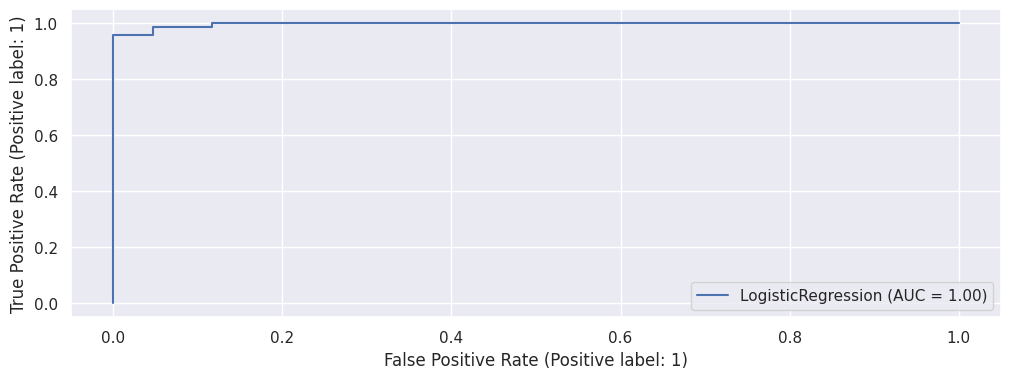

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf_lr, X_test, y_test);

### L1-regularization

In [ ]:
# Create a class instance
clf_lr = LogisticRegression(penalty='l1', solver='liblinear')

# Train the model using train data
clf_lr.fit(X_train, y_train);

# Make predictions
y_pred = clf_lr.predict(X_test)
y_pred_probas = clf_lr.predict_proba(X_test)[:,1]

# Calculate the scores
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1:.2f}")

roc_auc = roc_auc_score(y_test, y_pred_probas)
print(f"ROC-AUC score: {roc_auc:.2f}")

F1 score: 0.97
ROC-AUC score: 1.00


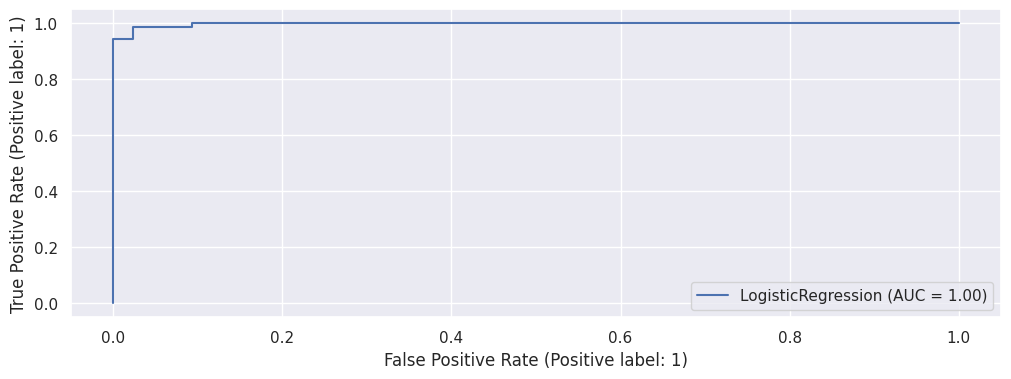

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf_lr, X_test, y_test);